# Análisis de Noticias sobre IA

## Librerias Utilizadas

In [112]:
!python -m spacy download es_core_news_lg -q  # Instalación silenciosa del modelo de lenguaje en español
import requests  # Para obtener datos de la web
from bs4 import BeautifulSoup  # Para analizar el contenido de la página HTML
import spacy  # Procesamiento de lenguaje natural
from collections import Counter  # Para contar palabras en el análisis de frecuencia
from wordcloud import WordCloud  # Para generar nubes de palabras
import matplotlib.pyplot as plt  # Para visualizar gráficos
from spacy import displacy  # Para mostrar análisis sintáctico y entidades

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Carga del modelo y extraccion de noticias de la web

In [42]:
# Cargar modelo de lenguaje en español
nlp = spacy.load("es_core_news_lg")

# URL de la página de noticias sobre Inteligencia Artificial
url = "https://www.lanacion.com.ar/tema/inteligencia-artificial-tid58563/"

# Obtener el contenido de la página
contenido = requests.get(url).text
soup = BeautifulSoup(contenido, "html.parser")

# Encontrar los primeros tres títulos dentro de <h2 class="com-title">
noticias = soup.find_all("h2", class_="com-title", limit=3)

# Lista para almacenar los títulos y enlaces
titulos_links = []

# Extraer títulos y enlaces
for noticia in noticias:
    enlace = noticia.find("a")
    if enlace:
        titulo = enlace.get("title")
        link = "https://www.lanacion.com.ar" + enlace.get("href")
        titulos_links.append((titulo, link))

# Función para obtener el texto completo del artículo
def obtener_texto(url):
    respuesta = requests.get(url)
    soup = BeautifulSoup(respuesta.text, "html.parser")

    # Extraer párrafos del artículo
    parrafos = soup.find_all("p")
    texto = " ".join([p.get_text() for p in parrafos])

    return texto

# Procesar cada artículo y mostrar resultados
for titulo, link in titulos_links:
    texto = obtener_texto(link)

    # Procesar con spaCy
    doc = nlp(texto)
    texto_procesado = " ".join([sent.text for sent in doc.sents])  # Todo el texto procesado

    print(f"\nTítulo del artículo: {titulo}")
    print(f"Enlace: {link}")
    print(f"Contenido completo:\n{texto_procesado}\n")


Título del artículo: ¿Sin tiempo, sin plata, sin ganas? La opción que puede convertirse en tu nuevo entrenador personal
Enlace: https://www.lanacion.com.ar/economia/IA/sin-tiempo-sin-plata-sin-ganas-la-opcion-que-puede-convertirse-en-tu-nuevo-entrenador-personal-nid22042025/
Contenido completo:
En la Argentina hay mucho fanatismo por el deporte, con especial acento en el fútbol. Pero los números de aficionados no se condicen con la cantidad de personas que efectivamente hacen educación física en el país. De acuerdo con un informe publicado por el Ministerio de Deporte y Turismo de la Nación, en colaboración con la Universidad Nacional de San Martín, el 45% de los argentinos mayores de 18 años no practica actividad física de manera regular. La Organización Mundial de la Salud aseguró que se podrían evitar alrededor de cinco millones de muertes al año si la población global fuese más activa. En esta línea, la institución recomienda que todos los adultos, incluso las personas que tienen 

## Procesamiento con Spacy

In [43]:
doc = nlp(texto_procesado) #tokenizacion
tokens = [token.text for token in doc]
print(tokens)

['Una', 'parte', 'de', 'los', 'usuarios', 'de', 'los', 'chatbots', 'de', 'inteligencia', 'artificial', '(', 'IA', ')', 'generativa', 'saluda', 'y', 'da', 'las', 'gracias', 'cuando', 'interacciona', 'con', 'ellos', ',', 'una', 'muestra', 'de', 'educación', 'que', 'tiene', 'un', 'coste', 'económico', ',', 'de', '“', 'decenas', 'de', 'millones', 'de', 'dólares', '”', 'en', 'el', 'caso', 'de', 'OpenAI', '.', 'Saludar', ',', 'pedir', 'las', 'cosas', 'por', 'favor', 'y', 'agradecer', 'a', 'los', 'demás', 'cuando', 'hacen', 'algo', 'por', 'nosotros', 'son', 'muestras', 'de', 'educación', 'que', 'se', 'suelen', 'escuchar', 'en', 'el', 'mundo', 'físico', ',', 'pero', 'que', 'rara', 'vez', 'se', 'trasladan', 'al', 'digital', '.', 'El', 'uso', 'de', 'fórmulas', 'de', 'cortesía', ',', 'como', '‘', 'por', 'favor', '’', 'y', '‘', 'gracias', '’', ',', 'no', 'es', 'algo', 'que', 'se', 'use', 'mucho', 'en', 'la', 'interacción', 'con', 'la', 'IA', ',', 'y', 'aunque', 'algunos', 'usuarios', 'creen', 'que

In [44]:
# Lematizacion: forma base (raiz) de cada token
for token in doc:
  #ignoramos puntuacion y espacios para mayor claridad
  if not token.is_punct and not token.is_space:
    print(f"{token.text}, {token.lemma_}")

Una, uno
parte, parte
de, de
los, el
usuarios, usuario
de, de
los, el
chatbots, chatbot
de, de
inteligencia, inteligencia
artificial, artificial
IA, IA
generativa, generativo
saluda, saluda
y, y
da, dar
las, el
gracias, gracia
cuando, cuando
interacciona, interaccionar
con, con
ellos, él
una, uno
muestra, muestra
de, de
educación, educación
que, que
tiene, tener
un, uno
coste, coste
económico, económico
de, de
decenas, decena
de, de
millones, millón
de, de
dólares, dólares
en, en
el, el
caso, caso
de, de
OpenAI, OpenAI
Saludar, saludar
pedir, pedir
las, el
cosas, cosa
por, por
favor, favor
y, y
agradecer, agradecer
a, a
los, el
demás, demá
cuando, cuando
hacen, hacer
algo, algo
por, por
nosotros, yo
son, ser
muestras, muestra
de, de
educación, educación
que, que
se, él
suelen, soler
escuchar, escuchar
en, en
el, el
mundo, mundo
físico, físico
pero, pero
que, que
rara, rara
vez, vez
se, él
trasladan, trasladar
al, al
digital, digital
El, el
uso, uso
de, de
fórmulas, fórmula
de, de
corte

In [45]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'Una' -> DET (determiner) -> DET
'parte' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'los' -> DET (determiner) -> DET
'usuarios' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'los' -> DET (determiner) -> DET
'chatbots' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'inteligencia' -> NOUN (noun) -> NOUN
'artificial' -> ADJ (adjective) -> ADJ
'(' -> PUNCT (punctuation) -> PUNCT
'IA' -> PROPN (proper noun) -> PROPN
')' -> PUNCT (punctuation) -> PUNCT
'generativa' -> ADJ (adjective) -> ADJ
'saluda' -> PROPN (proper noun) -> PROPN
'y' -> CCONJ (coordinating conjunction) -> CCONJ
'da' -> VERB (verb) -> VERB
'las' -> DET (determiner) -> DET
'gracias' -> NOUN (noun) -> NOUN
'cuando' -> SCONJ (subordinating conjunction) -> SCONJ
'interacciona' -> VERB (verb) -> VERB
'con' -> ADP (adposition) -> ADP
'ellos' -> PRON (pronoun) -> PRON
',' -> PUNCT (punctuation) -> PUNCT
'una' -> DET (determiner) -> DET
'muestra' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'ed

In [46]:
# Analisis de dependencia sintactica
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'Una' -> det (determiner) -> 'parte'
'parte' -> nsubj (nominal subject) -> 'saluda'
'de' -> case (case marking) -> 'usuarios'
'los' -> det (determiner) -> 'usuarios'
'usuarios' -> nmod (modifier of nominal) -> 'parte'
'de' -> case (case marking) -> 'chatbots'
'los' -> det (determiner) -> 'chatbots'
'chatbots' -> nmod (modifier of nominal) -> 'usuarios'
'de' -> case (case marking) -> 'inteligencia'
'inteligencia' -> nmod (modifier of nominal) -> 'chatbots'
'artificial' -> amod (adjectival modifier) -> 'inteligencia'
'(' -> punct (punctuation) -> 'IA'
'IA' -> appos (appositional modifier) -> 'chatbots'
')' -> punct (punctuation) -> 'IA'
'generativa' -> amod (adjectival modifier) -> 'chatbots'
'saluda' -> ROOT (root) -> 'saluda'
'y' -> cc (coordinating conjunction) -> 'da'
'da' -> conj (conjunct) -> 'saluda'
'las' -> det (determiner) -> 'gracias'
'gracias' -> obj (object) -> 'da'
'cuando' -> mark (marker) -> 'interacciona'
'interacciona' -> advcl (adverbial clause modifier) -> 'da'
'con' 

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [47]:
displacy.render(doc, style ="dep", jupyter=True, options={"distance": 120})

In [48]:
# Entidades nombradas

if doc.ents:
  print("Entidades encontradas:")
  print("texto de la entidad ... Etiqueta (tipo)")
  for ent in doc.ents:
    print(f"{ent.text} --- {ent.label_} --- {spacy.explain(ent.label_)}")
else:
  print("No se encontraron entidades nombradas")

Entidades encontradas:
texto de la entidad ... Etiqueta (tipo)
IA --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
OpenAI --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
Saludar --- PER --- Named person or family.
El uso de fórmulas de cortesía --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
IA --- ORG --- Companies, agencies, institutions, etc.
Diseño --- ORG --- Companies, agencies, institutions, etc.
Microsoft Copilot --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
Kurtis Beavers --- PER --- Named person or family.
IA --- ORG --- Companies, agencies, institutions, etc.
Sin embargo, --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
OpenAI --- MISC --- Miscellaneous entities, e.g. events, nationalities, products or works of art
ChatGPT --- MISC --- Miscellaneous entities, e.g. even

In [49]:
displacy.render(doc, style="ent", jupyter=True, options={"distance": 200})

## Generación de nube de palabras


In [136]:
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [137]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
#funcion para limpiar texto
def limpiar_texto(texto):
  palabra_a_eliminar= ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'ó','si','oh','allí','cuanto','cerca','parece','ay','p','quien','sido','dice','quién','dio','se','tan']

#Anexa las palabras que queremos eliminar a la lista de Stopwords
  black_list = stopwords_es.union(palabra_a_eliminar)
  texto_minuscula = texto.lower()
  texto_limpio = re.sub(r'[^\w\s]', '', texto_minuscula)
  palabras = texto_limpio.split()
  palabras_importantes =[]
  for palabra in palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)
  return(palabras_importantes)

texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

In [141]:
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="magma").generate(texto_limpio)

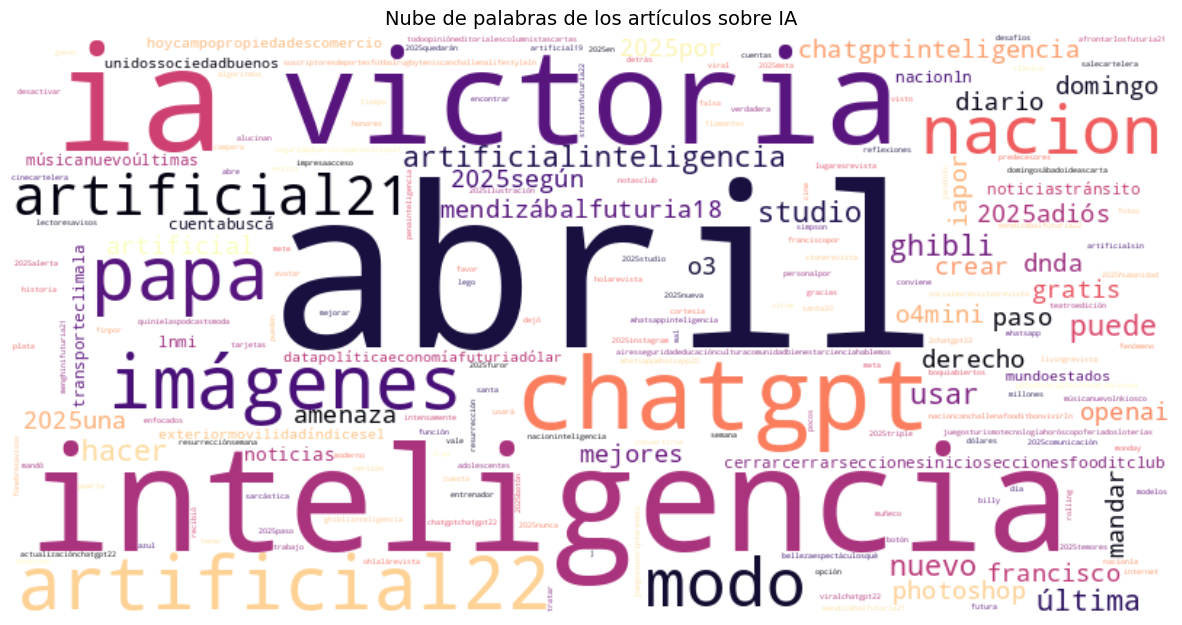

In [142]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de los artículos sobre IA", fontsize=14, color="black")  # Agregar título
plt.show()

In [143]:
from collections import Counter

texto_completo = " ".join(texto_procesado)  # Unimos el contenido de los artículos
palabras_limpias = limpiar_texto(texto_procesado)  # Aplicamos limpieza
frecuencia_palabras = Counter(palabras_limpias)  # Contamos frecuencia de palabras

# Mostrar las 20 palabras más comunes
print("\n🔎 **Frecuencia de palabras más usadas:**")
for palabra, frecuencia in frecuencia_palabras.most_common(20):
    print(f"{palabra}: {frecuencia}")


🔎 **Frecuencia de palabras más usadas:**
usuario: 4
ia: 3
caso: 3
interacción: 3
usuarios: 2
chatbots: 2
gracias: 2
muestra: 2
educación: 2
coste: 2
decenas: 2
millones: 2
dólares: 2
openai: 2
favor: 2
uso: 2
director: 2
dnda: 2
parte: 1
inteligencia: 1


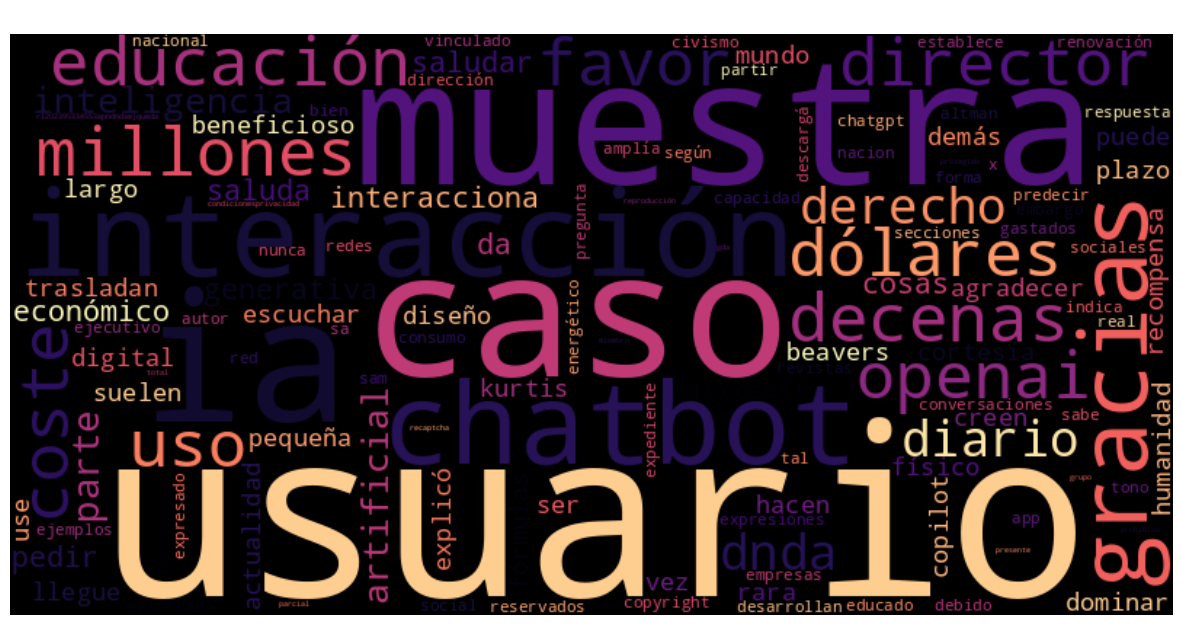

In [135]:
# Crear la nube de palabras con el texto limpio
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="magma").generate(" ".join(palabras_limpias))

# Mostrar la nube de palabras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar los ejes
plt.title("Nube de palabras de los artículos sobre IA", fontsize=14, color="white")
plt.show()

##Envío automático de noticias por correo

In [64]:
### Extra

#intento automatizar el envio de el texto a mi correo con yagmail

!pip install yagmail -q #instalo la libreria

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
def enviar_correo():
    #  Ruta del archivo JSON en Google Drive
    oauth_path = "/content/drive/MyDrive/archivoCredencialG.json"

    #  Autenticación con yagmail usando OAuth
    yag = yagmail.SMTP("xxxx@gmail.com", oauth2_file=oauth_path)

    #  Configurar destinatario y asunto
    destinatario = "xxxx@gmail.com"
    asunto = "Noticias de Inteligencia Artificial en La Nación"

    #  Verificar que `titulos_links` tiene contenido
    if not titulos_links:
        print("⚠ No hay noticias para enviar.")
        return

    #  Construcción del cuerpo del correo con resumen y link
    cuerpo = "\n\n".join([
        f"📰 {titulo}\n\n📄 {texto[:300]}...\n\n🔗 {link}"
        for titulo, link, texto in [
            (titulo, link, " ".join([sent.text for sent in nlp(obtener_texto(link)).sents]))
            for titulo, link in titulos_links]])

    #  Enviar el correo
    yag.send(to=destinatario, subject=asunto, contents=cuerpo)
    print("📩 ¡Correo enviado con éxito!")


📩 ¡Correo enviado con éxito!


In [148]:
# Llamar la función de envío
enviar_correo()

📩 ¡Correo enviado con éxito!
